# Analisis de datos de vehiculos electricos en Colombia

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# URL del conjunto de datos
url = "https://www.datos.gov.co/resource/7qfh-tkr3.json"
# Realizar la solicitud GET
response = requests.get(url)
# Comprobar el estado de la solicitud
if response.status_code == 200:
    print("Conexión exitosa a la API.")
    data = response.json()

    # Convertir los datos a un DataFrame de pandas
    df = pd.DataFrame(data)
 
print(df.shape)

Conexión exitosa a la API.
(1000, 22)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   combustible          1000 non-null   object
 1   estado               1000 non-null   object
 2   modelo               1000 non-null   object
 3   fecha_registro       1000 non-null   object
 4   anio_registro        1000 non-null   object
 5   clasificacion        1000 non-null   object
 6   clase                1000 non-null   object
 7   servicio             1000 non-null   object
 8   marca                1000 non-null   object
 9   linea                1000 non-null   object
 10  carroceria           1000 non-null   object
 11  modalidad            711 non-null    object
 12  organismo_transito   1000 non-null   object
 13  municipio            1000 non-null   object
 14  departamento         1000 non-null   object
 15  capacidad_pasajeros  115 non-null    object
 16  peso   

In [8]:
df.head(5)

,combustible,estado,modelo,fecha_registro,anio_registro,clasificacion,clase,servicio,marca,linea,...,organismo_transito,municipio,departamento,capacidad_pasajeros,peso,potencia,ejes,cantidad,cilindraje,capacidad_carga
0,ELECTRICO,ACTIVO,2022,2022-06-30T00:00:00.000,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,49,20000,402,2,1,NaN,NaN
1,ELECTRICO,ACTIVO,2023,2022-10-21T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,INSTITUTO DE MOVILIDAD DE PEREIRA,PEREIRA,Risaralda,NaN,1980,134,2,1,0,NaN
2,ELECTRICO,ACTIVO,2014,2015-09-28T00:00:00.000,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,STRIA TTOyTTE MCPAL FLORENCIA,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,1,0,NaN
3,ELECTRICO,ACTIVO,2021,2022-08-10T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,STRIA TTOyTTE MCPAL FUNZA,FUNZA,Cundinamarca,NaN,2550,80,NaN,1,NaN,845
4,ELECTRICO,ACTIVO,2022,2021-10-25T00:00:00.000,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,STRIA TTEyMOV CUND/EL ROSAL,EL ROSAL,Cundinamarca,NaN,2120,161,2,1,0,NaN


In [9]:
# Genero una copia del dataframe 
df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   combustible          1000 non-null   object
 1   estado               1000 non-null   object
 2   modelo               1000 non-null   object
 3   fecha_registro       1000 non-null   object
 4   anio_registro        1000 non-null   object
 5   clasificacion        1000 non-null   object
 6   clase                1000 non-null   object
 7   servicio             1000 non-null   object
 8   marca                1000 non-null   object
 9   linea                1000 non-null   object
 10  carroceria           1000 non-null   object
 11  modalidad            711 non-null    object
 12  organismo_transito   1000 non-null   object
 13  municipio            1000 non-null   object
 14  departamento         1000 non-null   object
 15  capacidad_pasajeros  115 non-null    object
 16  peso   

In [10]:
# URL de descarga del dataset en formato CSV
csv_url = "https://www.datos.gov.co/api/views/7qfh-tkr3/rows.csv?accessType=DOWNLOAD"

# Realizar la solicitud GET para descargar el archivo CSV
response = requests.get(csv_url)

# Guardar el archivo CSV localmente
with open("vehiculos_electricos_hibridos.csv", "wb") as file:
    file.write(response.content)

print(" El Archivo CSV fue descargado correctamente.")

 El Archivo CSV fue descargado correctamente.


In [11]:
# Cargar el archivo CSV descargado con las columnas que tienes en el DataFrame
file_path = r'C:\Users\Daniel\Downloads\Caso tecnico-20241015T132737Z-001\Caso tecnico\vehiculos_electricos_hibridos.csv'
df2 = pd.read_csv(file_path)
df2=df2.rename(columns={})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [12]:
# Filtrar por los últimos
n_years = 13
current_year = pd.Timestamp.now().year
filtro_data = df2[df2['AÑO_REGISTRO'] >= (current_year - n_years)]

# Filtrar únicamente los vehículos eléctricos
v_electrico = filtro_data[filtro_data['COMBUSTIBLE'].str.contains('ELECTRICO', case=False, na=False)]
v2_combinado= filtro_data[filtro_data['COMBUSTIBLE'].str.contains('GASO ELEC', case=False, na=False)]
v_disel_elec = filtro_data[filtro_data['COMBUSTIBLE'].str.contains('DIES ELEC', case=False, na=False)]

# Analizar la tendencia de crecimiento
growth_electric = v_electrico.groupby('AÑO_REGISTRO').size().reset_index(name='Cantidad de Vehículos')
print("Tendencia de crecimiento de vehículos eléctricos en los últimos 13 años:\n", growth_electric.head(5))

growth_combustion = v2_combinado.groupby('AÑO_REGISTRO').size().reset_index(name='Cantidad de Vehículos')
print("Tendencia de crecimiento de vehículos gaso-electricos en los últimos años:\n", growth_combustion.head(5))

growth_disel_elect = v_disel_elec.groupby('AÑO_REGISTRO').size().reset_index(name='Cantidad de Vehículos')
print("Tendencia de crecimiento de disel-electricos en los últimos años:\n", growth_disel_elect.head(5))





Tendencia de crecimiento de vehículos eléctricos en los últimos 13 años:
    AÑO_REGISTRO  Cantidad de Vehículos
0          2011                    108
1          2012                    150
2          2013                    300
3          2014                    251
4          2015                    508
Tendencia de crecimiento de vehículos gaso-electricos en los últimos años:
    AÑO_REGISTRO  Cantidad de Vehículos
0          2011                      3
1          2012                     10
2          2013                      3
3          2014                      2
4          2015                      5
Tendencia de crecimiento de disel-electricos en los últimos años:
    AÑO_REGISTRO  Cantidad de Vehículos
0          2011                      1
1          2013                      3
2          2014                    222
3          2015                     72
4          2016                     51


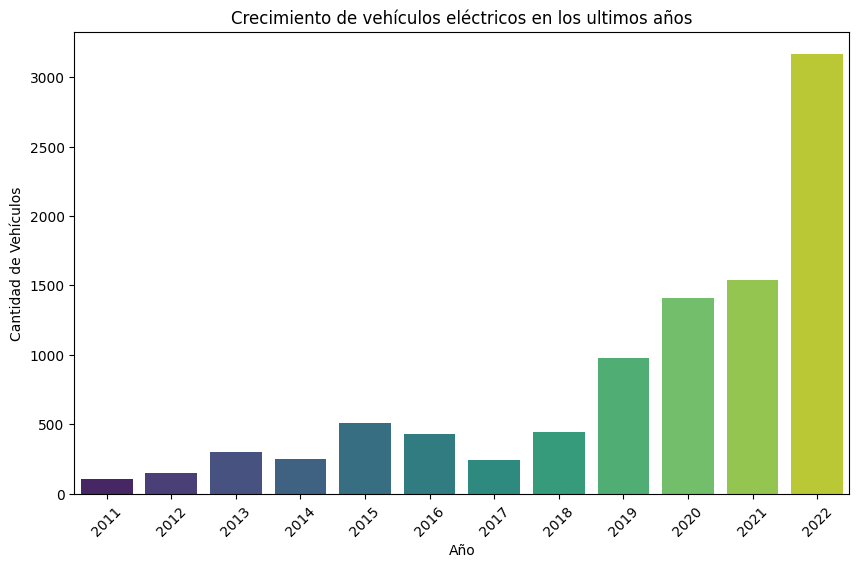

In [13]:
# Grafico de crecimiento de vehiculos 
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", growth_electric.shape[0])
sns.barplot(x='AÑO_REGISTRO', y='Cantidad de Vehículos', data=growth_electric, palette=palette, hue='AÑO_REGISTRO', legend=False)
plt.title('Crecimiento de vehiculos electricos en los ultimos años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45)
plt.show()


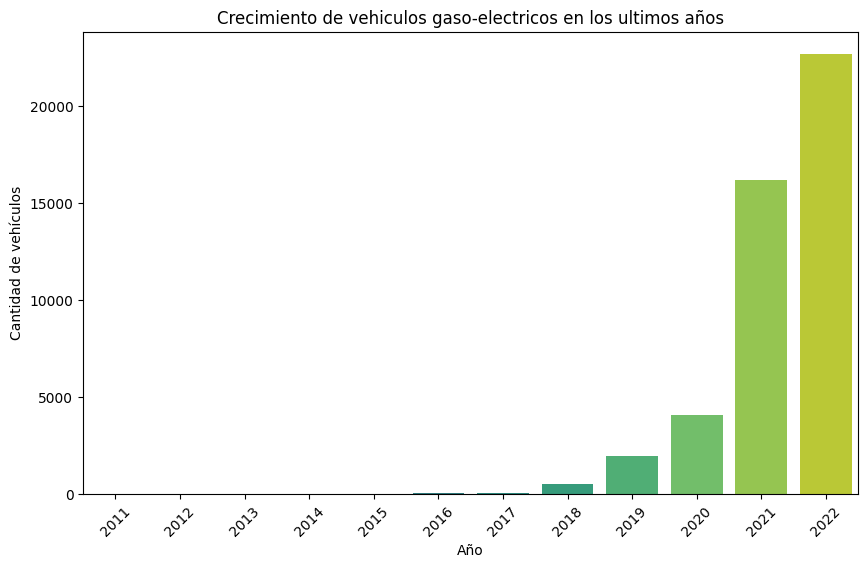

In [25]:
#Grafico de crecimiento de vehiculos gaso electricos
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", growth_combustion.shape[0])
sns.barplot(x='AÑO_REGISTRO', y='Cantidad de Vehículos', data=growth_combustion, palette=palette, hue='AÑO_REGISTRO', legend=False)
plt.title('Crecimiento de vehiculos gaso-electricos en los ultimos años')
plt.xlabel('Año')
plt.ylabel('Cantidad de vehículos')
plt.xticks(rotation=45)
plt.show()

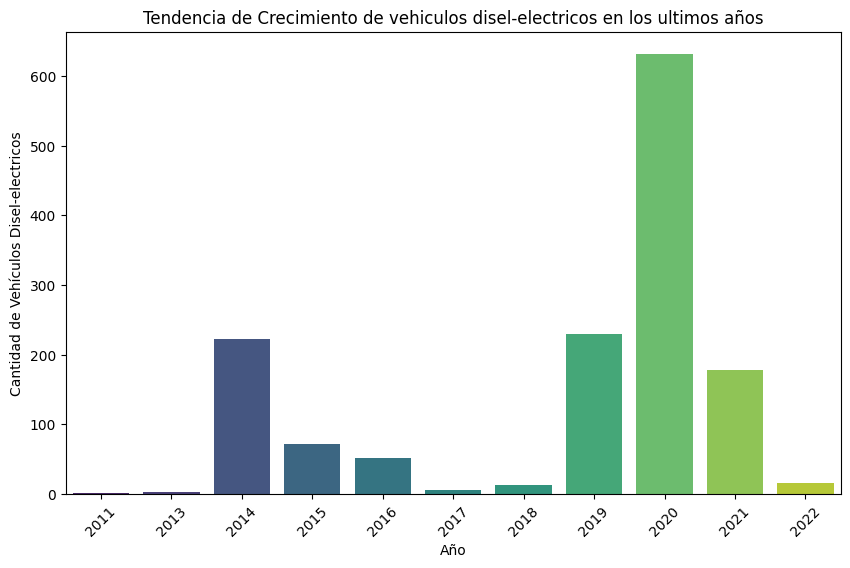

In [26]:
# Grafico de crecimiento de vehiculos disel-electricos
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", growth_disel_elect.shape[0])
sns.barplot(x='AÑO_REGISTRO', y='Cantidad de Vehículos', data=growth_disel_elect, palette=palette, hue='AÑO_REGISTRO', legend=False)
plt.title('Tendencia de Crecimiento de vehiculos disel-electricos en los ultimos años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehículos Disel-electricos')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Analizar la distribución geográfica de los vehiculos electricos por departamentos
disctribucion_g = v_electrico.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
print("Distribución geografica de vehiculos electricos:\n", disctribucion_g.head(10))

Distribución geografica de vehiculos electricos:
                               DEPARTAMENTO  Cantidad de Vehículos
0                                 Amazonas                      1
1                                Antioquia                   2718
2                                   Arauca                      5
3  Archipielago de San Andres, Providencia                      4
4                                Atlantico                     40
5                              Bogota D.C.                   4667
6                                  Bolivar                     35
7                                   Boyaca                     12
8                                   Caldas                     41
9                                  Caqueta                      9


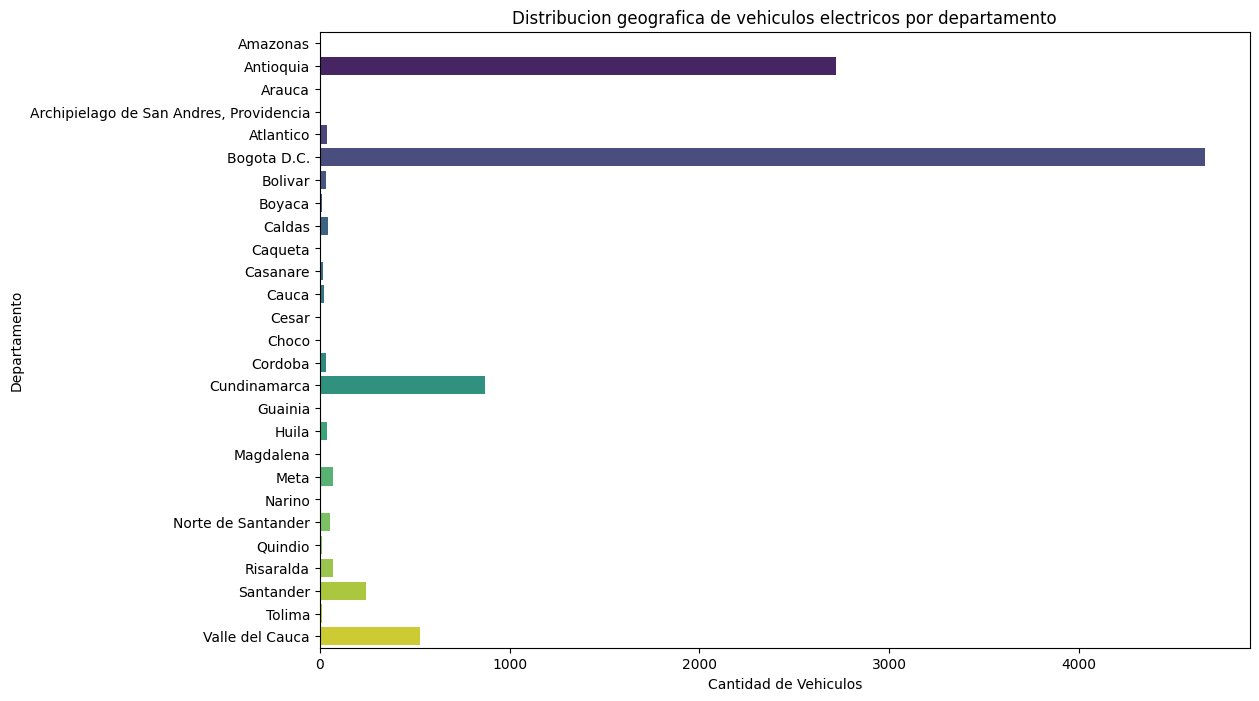

In [32]:
# Agrupar los datos por departamento y contar la cantidad de vehículos
distribucion_g = v_electrico.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
distribucion_g['DEPARTAMENTO'] = distribucion_g['DEPARTAMENTO'].astype('category')
plt.figure(figsize=(12, 8))
distribucion_g = distribucion_g.sort_values('Cantidad de Vehículos', ascending=False)

# Gráfico de barras de los departamentos
sns.barplot(x='Cantidad de Vehículos', y='DEPARTAMENTO', data=distribucion_g, palette='viridis', hue='DEPARTAMENTO', legend=False)
plt.title('Distribucion geografica de vehiculos electricos por departamento')
plt.xlabel('Cantidad de Vehiculos')
plt.ylabel('Departamento')
plt.show()

In [28]:
# Analizar la distribución geografica de vehiculos gaso-electricos por departamentos
disctribucion_g2 = v2_combinado.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
print("Distribucion geografica de vehiculos Gaso-electricos:\n", disctribucion_g2.head(10))

Distribución geografica de vehiculos gaso-electricos:
                               DEPARTAMENTO  Cantidad de Vehículos
0                                 Amazonas                      1
1                                Antioquia                  11132
2                                   Arauca                      2
3  Archipielago de San Andres, Providencia                      4
4                                Atlantico                    780
5                              Bogota D.C.                  20168
6                                  Bolivar                    181
7                                   Boyaca                    429
8                                   Caldas                    696
9                                  Caqueta                     78


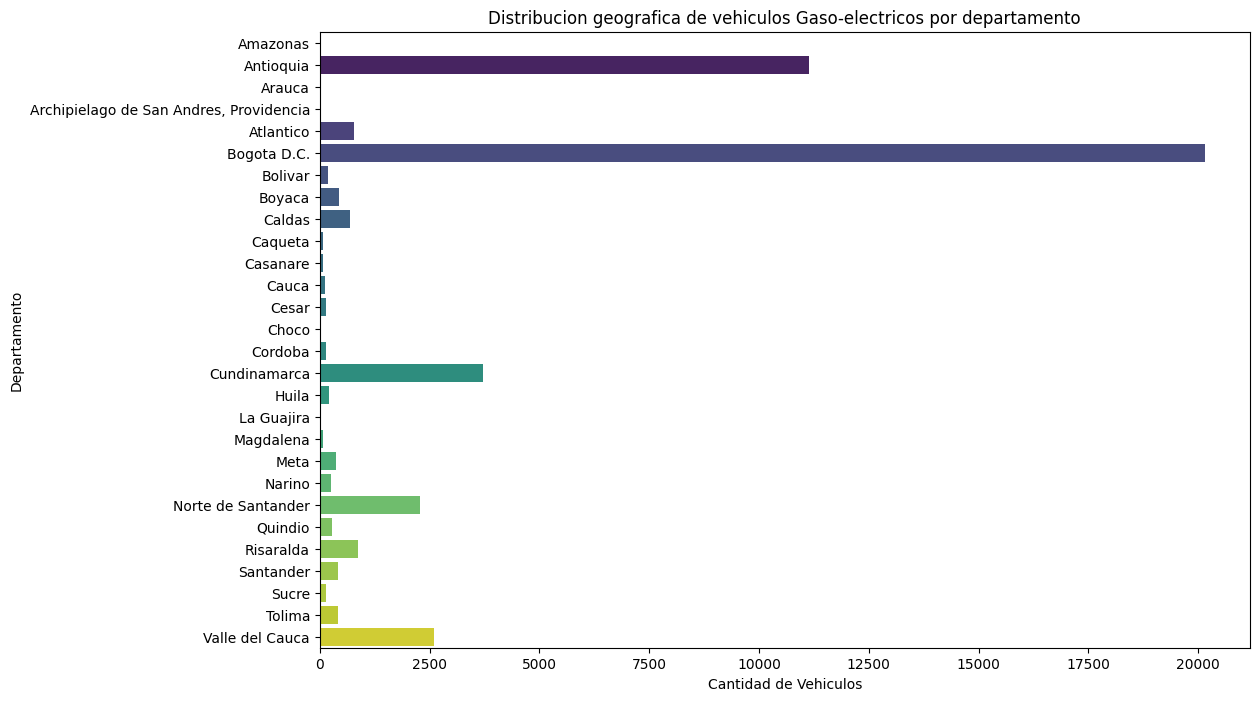

In [35]:
# Agrupar los datos por departamento y contar la cantidad de vehiculos
disctribucion_g2 = v2_combinado.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
disctribucion_g2['DEPARTAMENTO'] = disctribucion_g2['DEPARTAMENTO'].astype('category')
plt.figure(figsize=(12, 8))
disctribucion_g2 = disctribucion_g2.sort_values('Cantidad de Vehículos', ascending=False)

# Gráfico de barras de los departamentos
sns.barplot(x='Cantidad de Vehículos', y='DEPARTAMENTO', data=disctribucion_g2, palette='viridis', hue='DEPARTAMENTO', legend=False)
plt.title('Distribucion geografica de vehiculos Gaso-electricos por departamento')
plt.xlabel('Cantidad de Vehiculos')
plt.ylabel('Departamento')
plt.show()

In [31]:
# Analizar la distribución geografica de vehiculos gaso-electricos por departamentos
disctribucion_g3 = v_disel_elec.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
print("Distribución geografica de vehiculos Disel-electricos:\n", disctribucion_g3.head(10))

Distribución geografica de vehiculos disel-electricos:
   DEPARTAMENTO  Cantidad de Vehículos
0    Antioquia                    375
1       Arauca                      1
2    Atlantico                     26
3  Bogota D.C.                    662
4      Bolivar                      4
5       Boyaca                     13
6       Caldas                     13
7     Casanare                      1
8        Cauca                      4
9        Cesar                      1


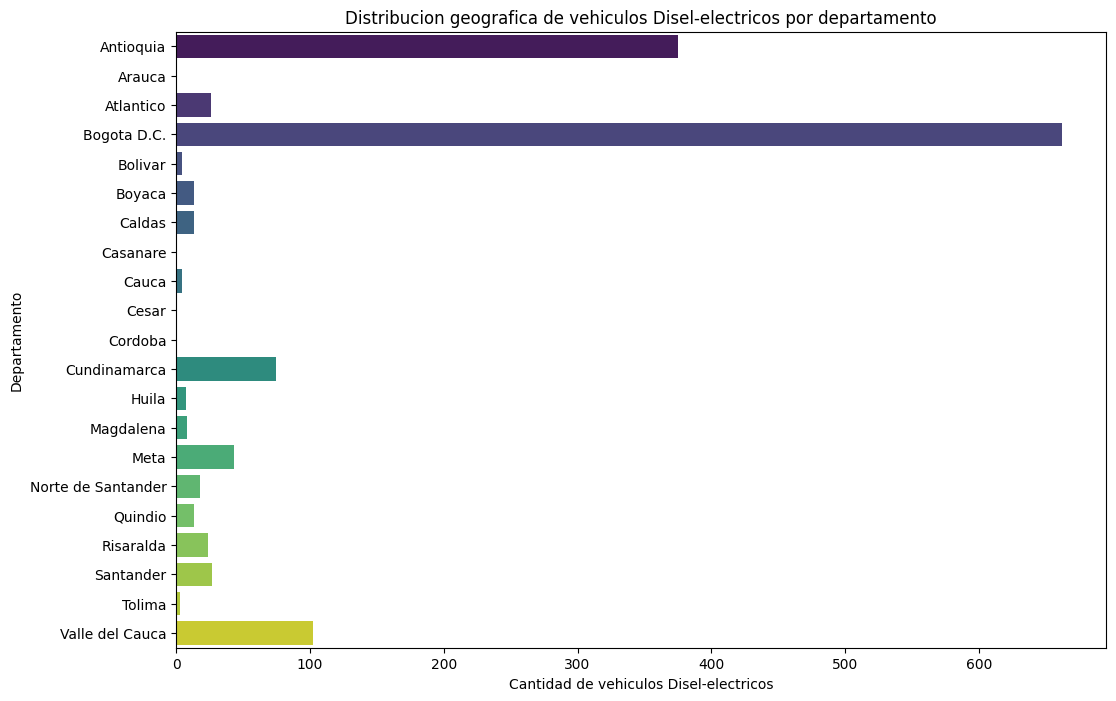

In [34]:
# Agrupar los datos por departamento y contar la cantidad de vehículos
disctribucion_g3 = v_disel_elec.groupby('DEPARTAMENTO').size().reset_index(name='Cantidad de Vehículos')
disctribucion_g3['DEPARTAMENTO'] = disctribucion_g3['DEPARTAMENTO'].astype('category')
plt.figure(figsize=(12, 8))
disctribucion_g3 = disctribucion_g3.sort_values('Cantidad de Vehículos', ascending=False)

# Crear el gráfico de barras 
sns.barplot(x='Cantidad de Vehículos', y='DEPARTAMENTO', data=disctribucion_g3, palette='viridis', hue='DEPARTAMENTO', legend=False)
plt.title('Distribucion geografica de vehiculos Disel-electricos por departamento')
plt.xlabel('Cantidad de vehiculos Disel-electricos')
plt.ylabel('Departamento')
plt.show()

In [23]:
# Combinar los datos en un solo DataFrame
growth_electric['COMBUSTIBLE'] = 'Eléctrico'
growth_combustion['COMBUSTIBLE'] = 'GASO ELEC'
growth_disel_elect['COMBUSTIBLE'] = 'DIES ELEC'
growth_combinada = pd.concat([growth_electric, growth_combustion, growth_disel_elect])
print("Comparativa entre vehículos eléctricos y de combustión interna en los últimos años:\n", growth_combinada.head(30))

Comparativa entre vehículos eléctricos y de combustión interna en los últimos años:
     AÑO_REGISTRO  Cantidad de Vehículos COMBUSTIBLE
0           2011                    108   Eléctrico
1           2012                    150   Eléctrico
2           2013                    300   Eléctrico
3           2014                    251   Eléctrico
4           2015                    508   Eléctrico
5           2016                    431   Eléctrico
6           2017                    247   Eléctrico
7           2018                    443   Eléctrico
8           2019                    979   Eléctrico
9           2020                   1408   Eléctrico
10          2021                   1538   Eléctrico
11          2022                   3167   Eléctrico
0           2011                      3   GASO ELEC
1           2012                     10   GASO ELEC
2           2013                      3   GASO ELEC
3           2014                      2   GASO ELEC
4           2015               

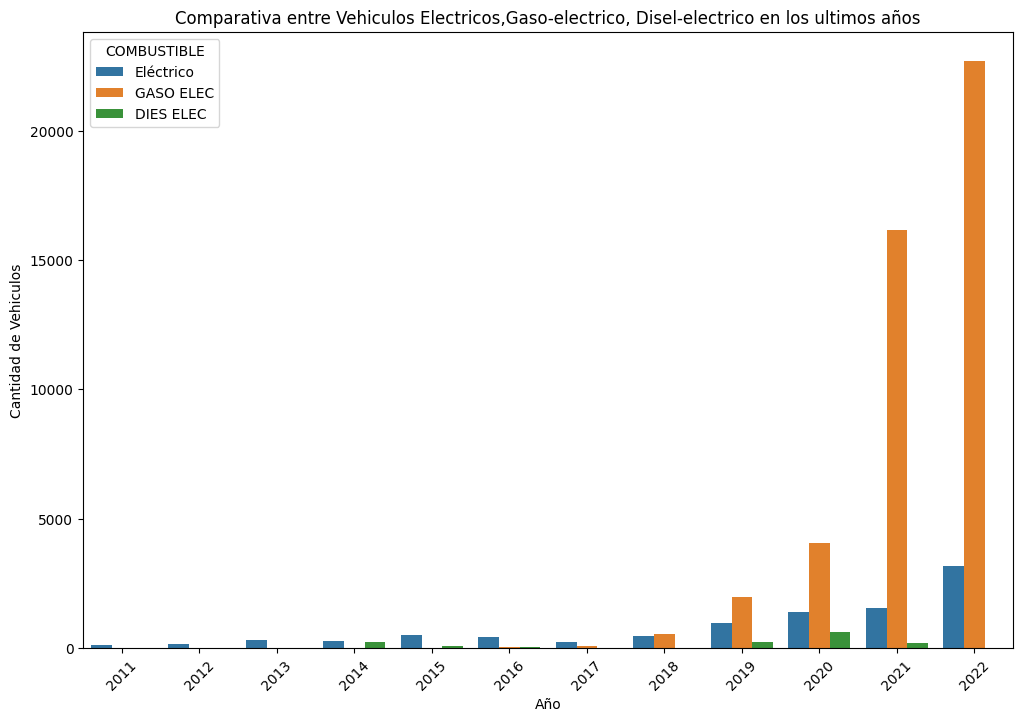

In [33]:
# Visualización de la comparativa
plt.figure(figsize=(12, 8))
sns.barplot(x='AÑO_REGISTRO', y='Cantidad de Vehículos', hue='COMBUSTIBLE', data=growth_combinada)
plt.title('Comparativa entre Vehiculos Electricos,Gaso-electrico, Disel-electrico en los ultimos años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehiculos')
plt.xticks(rotation=45)
plt.legend(title='COMBUSTIBLE')
plt.show()